In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
massa = 0.15
v0 = 50
sin = np.sin(np.radians(35))
cos = np.cos(np.radians(35))
dt = 0.01
g = 9.806
d = 0.0013

In [4]:
vx = v0 * cos
vy = v0 * sin
ax1 = 0
ay1 = -g
tTotal = (2*v0*sin)/g
xMaks = v0*cos*tTotal
yMaks = (vy*vy)/(-2*ay1)

In [5]:
def numerik_tanpa_hambatan(vx,vy):
    posX = []
    posY = []
    x = 0
    y = 0
    while True:
        vy = vy + (ay1 * dt)
        y = y + (vy * dt)
        x = x + (vx * dt)
        posX.append(x)
        posY.append(y)
        if(y<0):
            break
    return posX,posY

In [16]:
def numerik_hambatan(vx,vy):
    posX = []
    posY = []
    x = 0
    y = 0
    v = 0
    while True :
        v = math.sqrt((np.power(vx,2)+np.power(vy,2)))
        ax2 = -(d/massa)*v*vx
        ay2 = -g-(d/massa)*v*vy
        vy = vy + (ay2 * dt)
        vx = vx + (ax2 * dt)
        y = y + (vy * dt)
        x = x + (vx * dt)
        posX.append(x)
        posY.append(y)
        if(y<0):
            break
    return posX,posY

In [7]:
def analitik(vx,vy):
    posX = []
    posY = []
    x = 0
    y = 0
    for i in np.arange(0,tTotal+dt,dt):
        x = vx * i
        y = (vy * i) - (0.5 * g * i * i)
        posX.append(x)
        posY.append(y)
        if(y<0):
            break
    return posX,posY

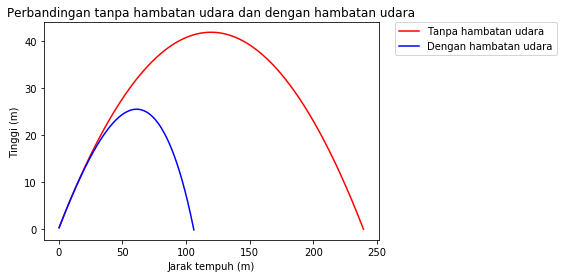

In [17]:
x1,y1 = numerik_tanpa_hambatan(vx,vy)
x2,y2 = numerik_hambatan(vx,vy)
plt.plot(x1,y1,'r',label = 'Tanpa hambatan udara')
plt.plot(x2,y2,'b',label = 'Dengan hambatan udara')
plt.title('Perbandingan tanpa hambatan udara dan dengan hambatan udara')
plt.xlabel('Jarak tempuh (m)')
plt.ylabel('Tinggi (m)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

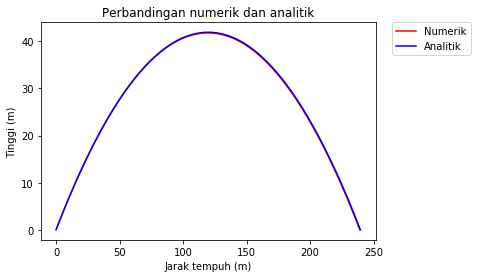

In [34]:
x3,y3 = analitik(vx,vy)
plt.plot(x1,y1,'r',label = 'Numerik')
plt.plot(x3,y3,'b',label = 'Analitik')
plt.title('Perbandingan numerik dan analitik')
plt.xlabel('Jarak tempuh (m)')
plt.ylabel('Tinggi (m)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)